In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

import albumentations as A
import cv2
import numpy as np
import skimage as ski

import matplotlib.pyplot as plt
import os
import copy

from tqdm import tqdm
from IPython.display import clear_output

import psutil
import pynvml
import sys

import struct
import scipy

import sklearn.metrics as metrics

import gc

sys.path.append('/home/meribejayson/Desktop/Projects/SharkCNN/training_models/dataloaders/')


from test_dataset import SharkDatasetTest as SharkDataset

In [ ]:
output_file_path = 'preds_labels.dat'

pynvml.nvmlInit()
handle = pynvml.nvmlDeviceGetHandleByIndex(0)

image_width = 1920
image_height = 1080

target_iters = 300
images_per_iter = 5

target_sample = image_height * image_width * target_iters * images_per_iter

In [ ]:
def read_from_binary_file(file_path):
    dt = np.dtype([('ann_pred', np.float32), ('lr_pred', np.float32), ('label', np.uint32)])
    
    record_size = dt.itemsize

    total_records = os.path.getsize(file_path) // record_size

    quarter_records = total_records // 8

    data = np.memmap(file_path, dtype=dt, mode='r', shape=(quarter_records,))
    
    ann_preds = data['ann_pred']
    lr_preds = data['lr_pred']
    labels = data['label'].astype(int)
    
    return ann_preds, lr_preds, labels

In [ ]:
preds_ann, preds_lr, all_labels = read_from_binary_file(output_file_path)

In [ ]:
def create_histogram(data, bins='auto', xlabel='Value', ylabel='Frequency', title='Histogram'):
    """
    Create a histogram from a numpy array.
    
    Parameters:
    - data: Numpy array containing the data
    - bins: Number of bins or binning strategy (default 'auto'). 
            It can be an integer for fixed number of bins or a string as recognized by numpy.histogram_bin_edges().
    - xlabel: Label for the x-axis (default 'Value').
    - ylabel: Label for the y-axis (default 'Frequency').
    - title: Title of the histogram (default 'Histogram').
    """
    # Calculate the histogram data
    counts, bin_edges = np.histogram(data, bins=bins)
    
    # Create the histogram plot
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bin_edges, edgecolor='k', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()
    plt.clf()

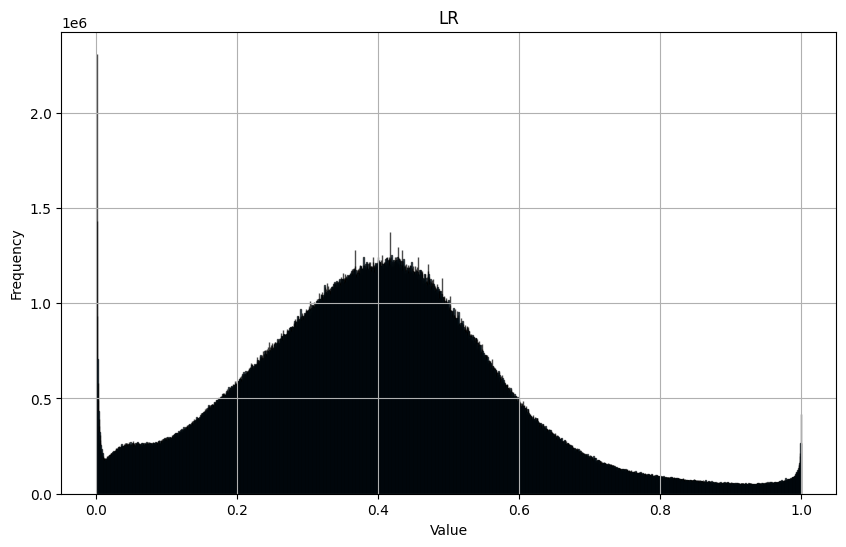

<Figure size 640x480 with 0 Axes>

In [13]:
create_histogram(preds_lr, title="LR")

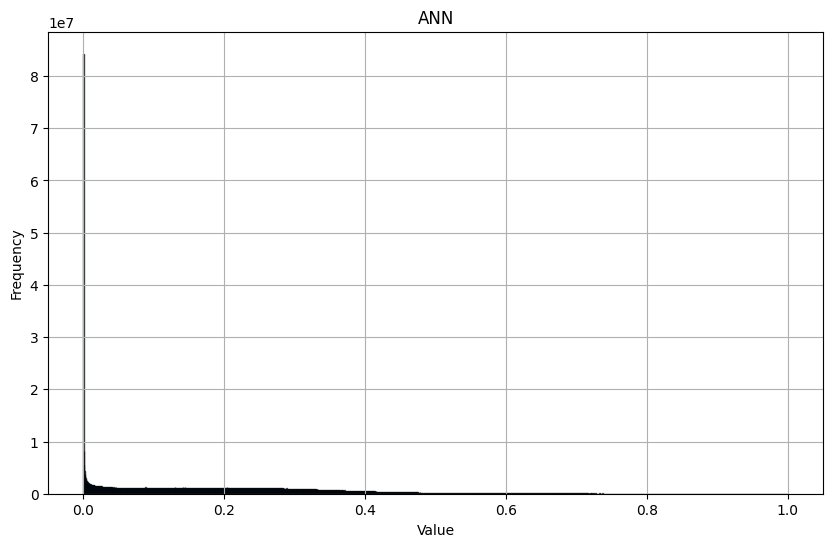

<Figure size 640x480 with 0 Axes>

In [14]:
create_histogram(preds_ann, title="ANN")